### Import Libraries

#### Links
1. Seaborn Plots  
https://seaborn.pydata.org/generated/seaborn.lineplot.html
    
2. Seaborn Examples  
https://seaborn.pydata.org/examples/index.html
    
3. Seaborn Tutorial  
https://seaborn.pydata.org/tutorial.html

In [ ]:
# import sys
# !{sys.executable} -m pip install 

# pandas
# matplotlib
# seaborn

In [1]:
import os
# os.listdir()

In [2]:
import json
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_3229432/986204484.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Helper Function for Plotting

In [3]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

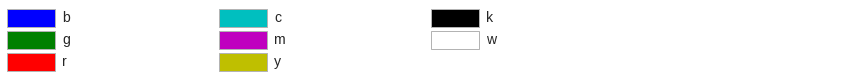

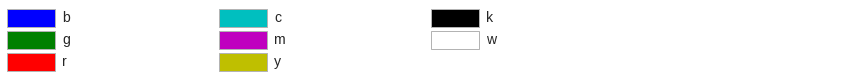

In [4]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

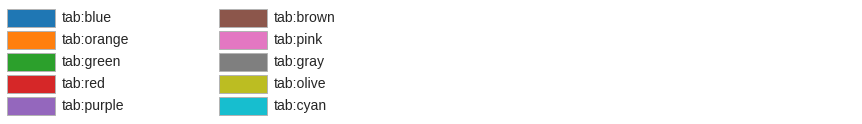

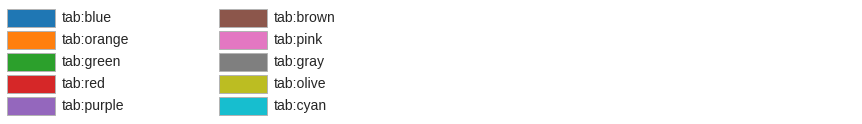

In [5]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

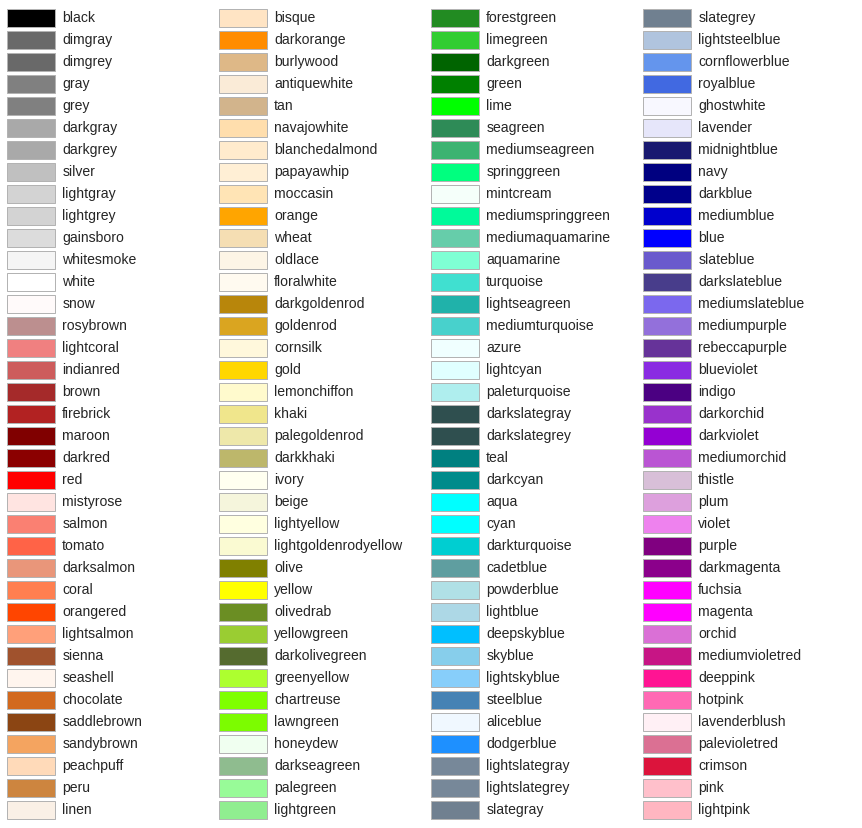

In [6]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### Read CSV to Dataframe

In [7]:
df_original = pd.read_csv('Dataset-950.csv')
df_original

,ID,TEXT,LABELS,INCLUDED
0,1,"Patwaari aur youthiye larte rehein ge, meanwhi...","{'id': '1', 'text': 'Patwaari aur youthiye lar...",0
1,2,I hope women get over their bad boy syndrome s...,"{'id': '2', 'text': ""I hope women get over the...",0
2,3,Kohli se itna pyaar hai toh India shift ho jao...,"{'id': '3', 'text': 'Kohli se itna pyaar hai t...",0
3,4,Saary desi landey ke liberals aur feminazis Im...,"{'id': '4', 'text': 'Saary desi landey ke libe...",0
4,5,Why is Halloween celebration gaining popularit...,"{'id': '5', 'text': 'Why is Halloween celebrat...",0
...,...,...,...,...
1986,1987,So weird how much that person shouting at baba...,NaN,1
1987,1988,Sometimes I wish Babar was a gora. He would ha...,NaN,1
1988,1989,Tbh Babar never asked himself to be called kin...,NaN,1
1989,1990,Ajeeb baat hy. Babar ko pasand bhi nhi krty ho...,NaN,1


In [8]:
df_original.dtypes

ID           int64
TEXT        object
LABELS      object
INCLUDED     int64
dtype: object

### Clean Dataframe and Make JSON dataset file

In [9]:
df = df_original[df_original['INCLUDED']==0]
df.reset_index(drop=True,inplace=True)
df = df.reset_index(level=0)
df = df.drop(columns=['ID'])
df = df.rename(columns={"index": "ID"}, errors="raise")
df

,ID,TEXT,LABELS,INCLUDED
0,0,"Patwaari aur youthiye larte rehein ge, meanwhi...","{'id': '1', 'text': 'Patwaari aur youthiye lar...",0
1,1,I hope women get over their bad boy syndrome s...,"{'id': '2', 'text': ""I hope women get over the...",0
2,2,Kohli se itna pyaar hai toh India shift ho jao...,"{'id': '3', 'text': 'Kohli se itna pyaar hai t...",0
3,3,Saary desi landey ke liberals aur feminazis Im...,"{'id': '4', 'text': 'Saary desi landey ke libe...",0
4,4,Why is Halloween celebration gaining popularit...,"{'id': '5', 'text': 'Why is Halloween celebrat...",0
...,...,...,...,...
956,956,You know what’s a bigger sin than homosexualit...,"{'id': '1588', 'text': 'You know what’s a bigg...",0
957,957,"""Fahashi ko aam hony sy rokain apny apny musta...","{'id': '1590', 'text': '""Fahashi ko aam hony s...",0
958,958,Zara yeh in liberals se pucho kiya role hai in...,"{'id': '1591', 'text': 'Zara yeh in liberals s...",0
959,959,So far ya'all have only brought disgrace to Pa...,"{'id': '1594', 'text': ""So far ya'all have onl...",0


In [10]:
print(df['LABELS'].isnull().sum())
print(df['LABELS'].isnull().values.any())

63
True


In [11]:
# Change NaN values in labels to an empty dict in a string
for i, f in df.iterrows():
    try:
        f['LABELS'] = eval(f['LABELS'])
    except:
        df.at[i, 'LABELS'] = json.dumps(dict(id=str(f['ID']), text=f['TEXT'], labels=[]))

# Remove string and convert to json/dict
# df['LABELS'] = df['LABELS'].apply(eval)

In [12]:
df['LABELS'].isnull().sum()

0

In [13]:
# Write to dataset.json file
# df['LABELS'].to_json('dataset.json', indent=4)

## Dataset Statistics
### 0.Basics

Total Number of Samples:   
Total Number of Spans:   
Average Sample Length:   
Maximum Sample Length:  
Minimum Sample Length:  
Median Sample Length:    
Average Span Length:   
Maximum Span Length:  
Minimum Span Length:   
Median Span Length:  
Samples with Labels:  
Samples w/o Labels:   
Average Number of Fallacies/Sample: 
Maximum Number of Fallacies/Sample:    
Minimum Number of Fallacies/Sample:  

### 1. Average Sentence Length

In [14]:
colour_chosen = 'dodgerblue'
# 'rosybrown'
# 'dodgerblue'
# 'green'

In [15]:
avg_sample_length_list = []
for label in df['LABELS']:
    text = label['text']
    avg_sample_length_list.append(len(text))
    if len(text) < 10:
        raise Exception('Length of example less than 10 characters')

In [16]:
pd.Series(avg_sample_length_list).describe()

count    961.000000
mean     146.770031
std       53.601211
min       42.000000
25%      110.000000
50%      135.000000
75%      169.000000
max      400.000000
dtype: float64

In [17]:
avg_sample_length = sum(avg_sample_length_list)/len(avg_sample_length_list)
avg_sample_length

146.7700312174818

In [18]:
avg_sample_length_list = np.array(avg_sample_length_list)
avg_sample_length_list = np.sort(avg_sample_length_list)

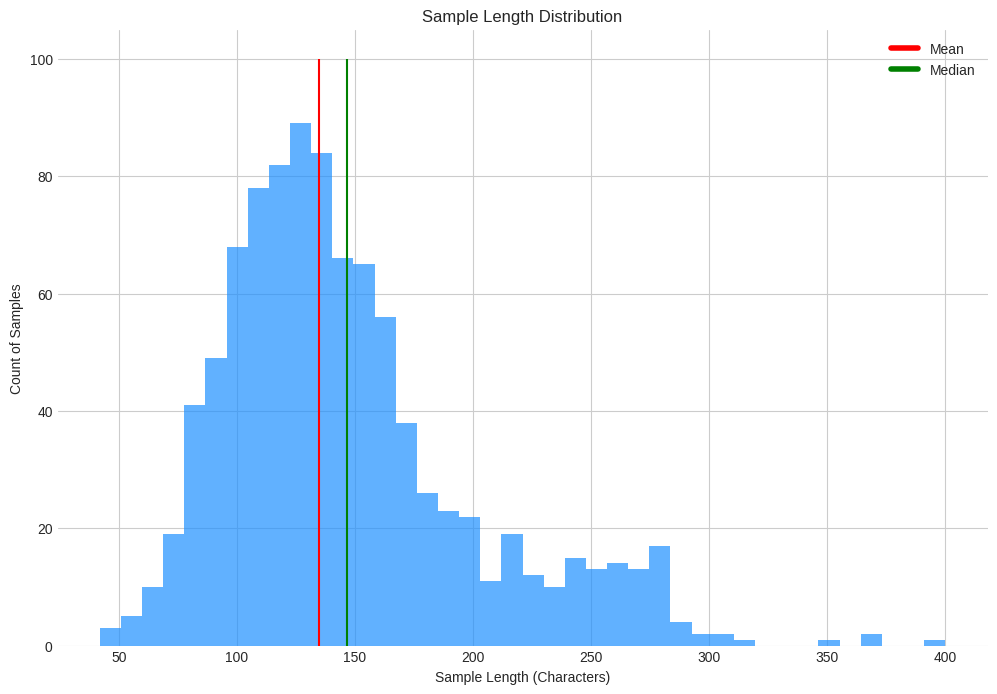

In [28]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.xlabel('Example Length (Characters)')
plt.ylabel('Count of Examples')
plt.title('Example Length Distribution')
n, bins, patches = plt.hist(avg_sample_length_list, bins=40, 
#             density = True, 
            color =colour_chosen,
            alpha = 0.7)

plt.vlines(pd.Series(avg_sample_length_list).mean(),0, 100, color = 'green')
plt.vlines(pd.Series(avg_sample_length_list).median(),0, 100, color = 'red')

custom_lines = [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

### 2. With or Without Labels

In [46]:
def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)

In [47]:
with_or_without_labels = [0,0]
for label in df['LABELS']:
    if len(label['labels']) == 0:
        with_or_without_labels[1] += 1
    else:
        with_or_without_labels[0] += 1
        
normalized = list(normalize(with_or_without_labels))

with_or_without_labels, normalized

([859, 102], [0.8938605619146722, 0.10613943808532779])

<Figure size 640x480 with 0 Axes>

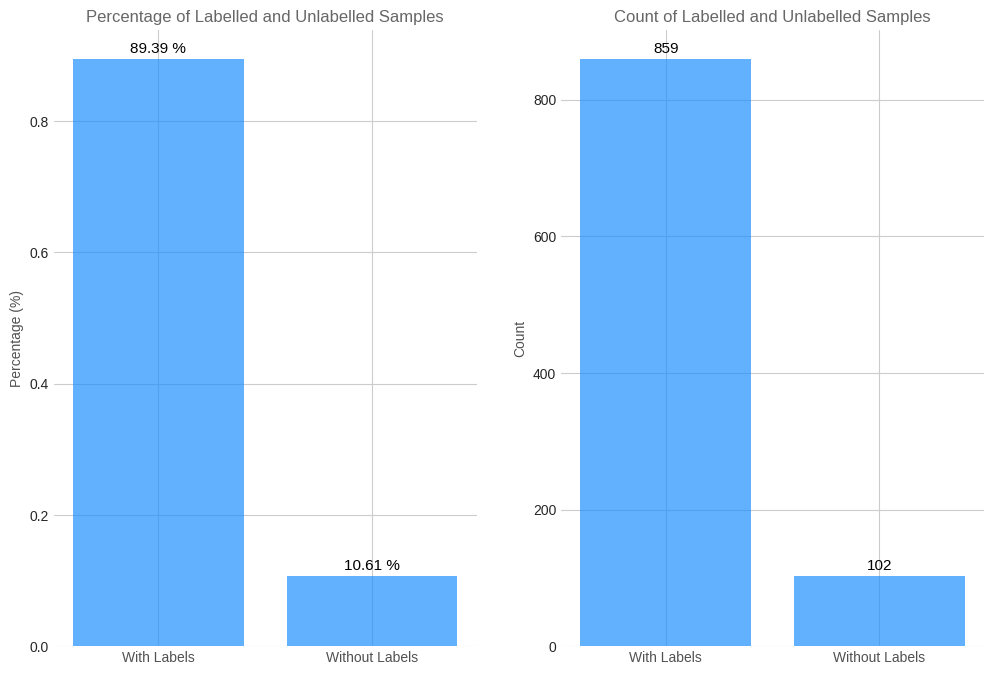

In [49]:
plt.figure()
plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


ax1 = plt.subplot(1,2,1)
label_names =['With Labels','Without Labels']
pos = np.arange(len(label_names))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, normalized, align='center', linewidth=0, color=colour_chosen, alpha=0.7)


# soften all labels by turning grey
plt.xticks(pos, label_names, alpha=0.8)
plt.ylabel('Percentage (%)', alpha=0.8)
plt.title('Percentage of Labelled and Unlabelled Examples', alpha=0.7)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 0.01, 
                   str(round(normalized[i]*100,2)) + ' %', 
                 ha='center', color='black', fontsize=11)
####################################### 2nd Plot
ax2 = plt.subplot(1,2,2)
label_names =['With Labels','Without Labels']
pos = np.arange(len(label_names))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, with_or_without_labels, align='center', linewidth=0, color=colour_chosen, alpha=0.7)


# soften all labels by turning grey
plt.xticks(pos, label_names, alpha=0.8)
plt.ylabel('Count', alpha=0.8)
plt.title('Count of Labelled and Unlabelled Examples', alpha=0.7)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 10, 
                   str(with_or_without_labels[i]), 
                 ha='center', color='black', fontsize=11)

plt.show()

### Example Length Distribution (With and Without Labels)

In [50]:
with_labels_samples, without_labels_samples = [], []
for label in df['LABELS']:
    text = label['text']
    if len(label['labels']) == 0:
        without_labels_samples.append(len(text))
    else:         
        with_labels_samples.append(len(text))
        
        
len(with_labels_samples), len(without_labels_samples)

(859, 102)

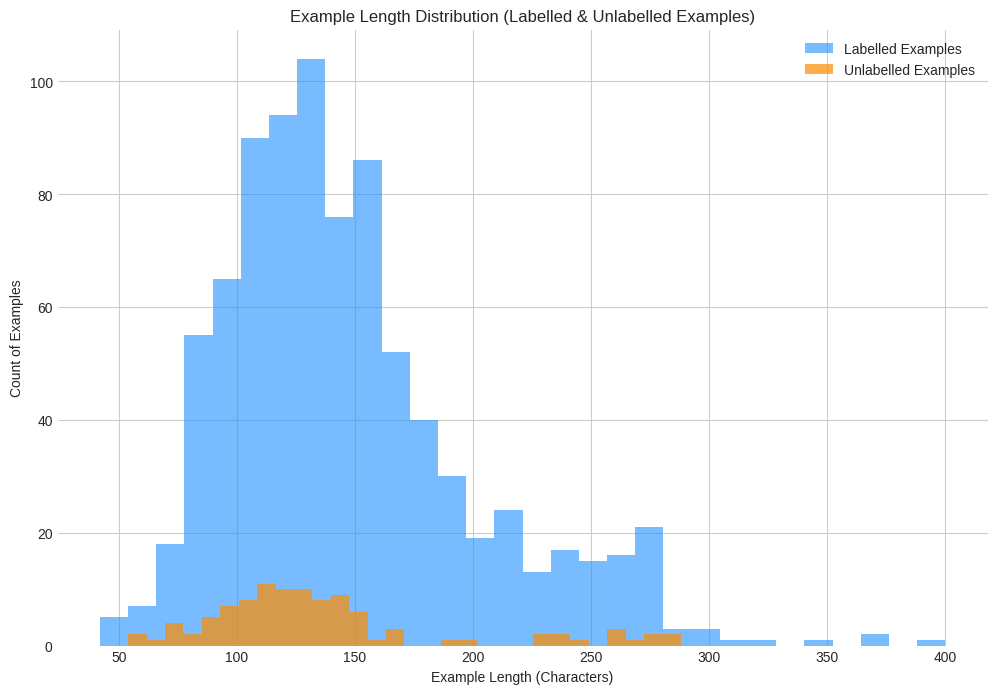

In [51]:
plt.figure(figsize=(12, 8))
plt.xlabel('Example Length (Characters)')
plt.ylabel('Count of Examples')
plt.title('Example Length Distribution (Labelled & Unlabelled Examples)')

plt.hist(with_labels_samples, alpha = 0.6, bins= 30, label='Labelled Examples',color =colour_chosen,)
plt.hist(without_labels_samples, alpha = 0.7, bins= 30, label='Unlabelled Examples', color='darkorange')
# color =colour_chosen,
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend()
plt.show()

### 3. Span Length Distribution

In [53]:
global_avg_span_length = []
class_avg_span_length = {}
for label in df['LABELS']:
    if len(label['labels']) != 0:
        for l in label['labels']:
            span = int(l['end_index']) - int(l['start_index'])
            global_avg_span_length.append(span)
            try:
                class_avg_span_length[l['technique']]['cumulative_span'] += span
                class_avg_span_length[l['technique']]['span_count'] += 1
            except:
                class_avg_span_length[l['technique']] = dict(cumulative_span = 0, span_count=0)
                class_avg_span_length[l['technique']]['cumulative_span'] += span
                class_avg_span_length[l['technique']]['span_count'] += 1

In [54]:
# Span Length Statistics
# Count is the total number of spans in the entire dataset
pd.Series(global_avg_span_length).describe()

count    2373.000000
mean       62.034555
std        67.241157
min         2.000000
25%        10.000000
50%        27.000000
75%       104.000000
max       400.000000
dtype: float64

<AxesSubplot: title={'center': 'Span Length Distribution'}, xlabel='Span Length', ylabel='Count'>

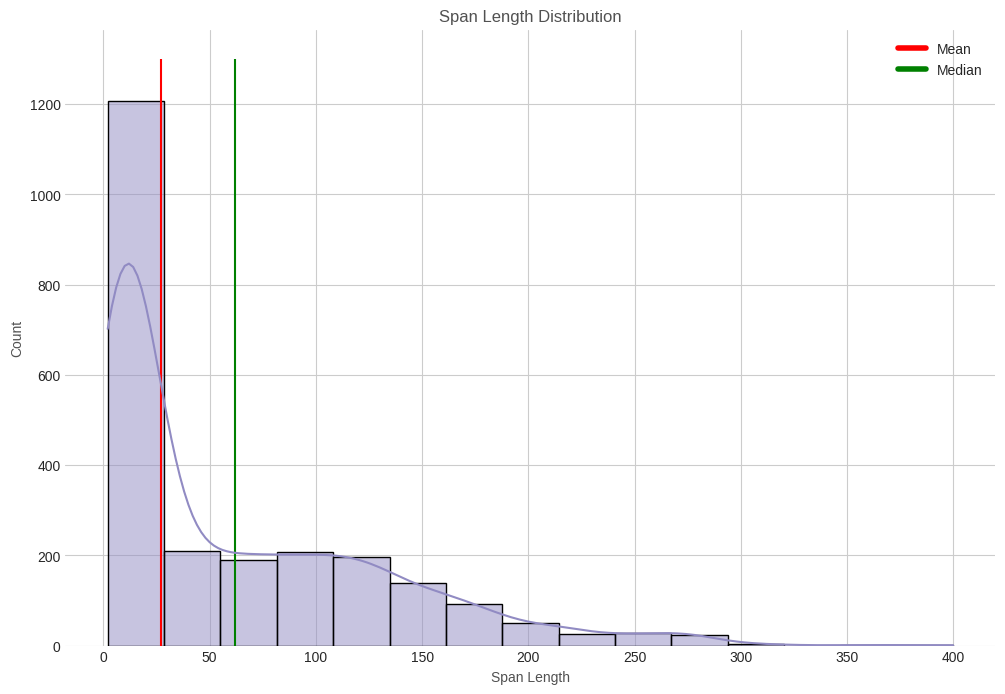

In [55]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.ylabel('Count of Spans', alpha=0.8)
plt.xlabel('Span Length', alpha=0.8)
plt.title('Span Length Distribution', alpha=0.8)

plt.vlines(pd.Series(global_avg_span_length).mean(),0, 1300, color = 'green')
plt.vlines(pd.Series(global_avg_span_length).median(),0, 1300, color = 'red')

custom_lines = [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'])

enmax_palette = ["#808282", "#C2CD23", "#918BC3"]
color_codes_wanted = ['grey', 'green', 'purple']

for spine in plt.gca().spines.values():
    spine.set_visible(False)

c = lambda x: enmax_palette[color_codes_wanted.index(x)]

sns.histplot(data=global_avg_span_length, kde=True, color=c("purple"), bins=15)

### 4. Total Number of Spans for Each Class / Class Distribution

In [27]:
for key, item in class_avg_span_length.items():
    class_avg_span_length[key]['average'] = np.round(item['cumulative_span']/item['span_count'], 2)
class_avg_span_length

{'Name calling/Labeling': {'cumulative_span': 8707,
  'span_count': 527,
  'average': 16.52},
 'Loaded Language': {'cumulative_span': 5876,
  'span_count': 657,
  'average': 8.94},
 'Smears': {'cumulative_span': 48442, 'span_count': 336, 'average': 144.17},
 'Appeal to fear/prejudice': {'cumulative_span': 11042,
  'span_count': 77,
  'average': 143.4},
 'Causal Oversimplification': {'cumulative_span': 7329,
  'span_count': 80,
  'average': 91.61},
 'Presenting Irrelevant Data (Red Herring)': {'cumulative_span': 7668,
  'span_count': 55,
  'average': 139.42},
 'Thought-terminating cliché': {'cumulative_span': 1165,
  'span_count': 43,
  'average': 27.09},
 'Black-and-white Fallacy/Dictatorship': {'cumulative_span': 2597,
  'span_count': 34,
  'average': 76.38},
 'Flag-waving': {'cumulative_span': 2732, 'span_count': 20, 'average': 136.6},
 'Slogans': {'cumulative_span': 936, 'span_count': 39, 'average': 24.0},
 'Exaggeration/Minimisation': {'cumulative_span': 27783,
  'span_count': 330,

In [28]:
list(class_avg_span_length.keys()) # Names of all PT in a list
total_number_of_spans_for_each_class = [val['span_count'] for val in list(class_avg_span_length.values())]
avarege_spans_for_each_class = [val['average'] for val in list(class_avg_span_length.values())]

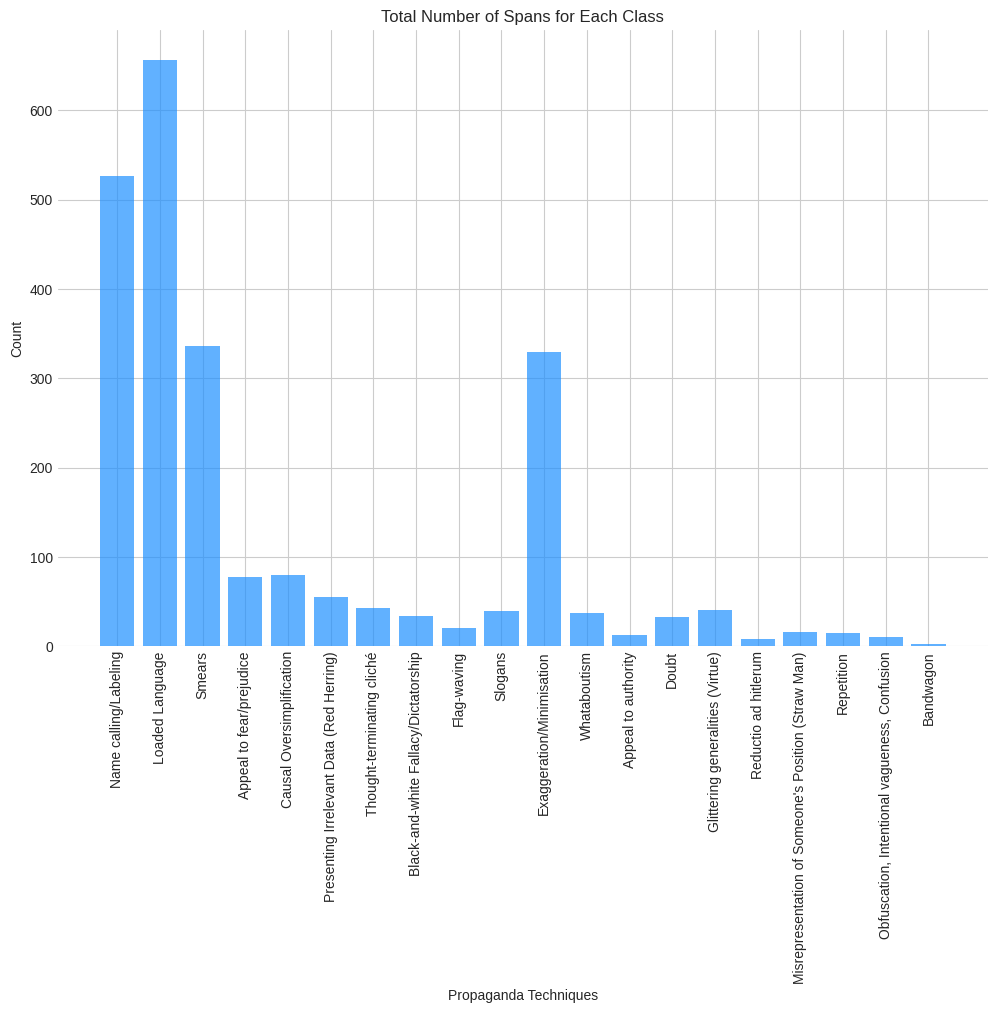

In [29]:
plt.figure(figsize = (12,8))

bars = plt.bar(range(len(class_avg_span_length)),total_number_of_spans_for_each_class, align = 'center', alpha = 0.7, color=colour_chosen)
plt.xticks(range(len(class_avg_span_length)),list(class_avg_span_length.keys()))
plt.ylabel('Count of Spans')
plt.xlabel('Propaganda Techniques')
plt.title('Total Number of Spans for Each Class')

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

   
plt.show()

### 5. Average Span Length for Each Class

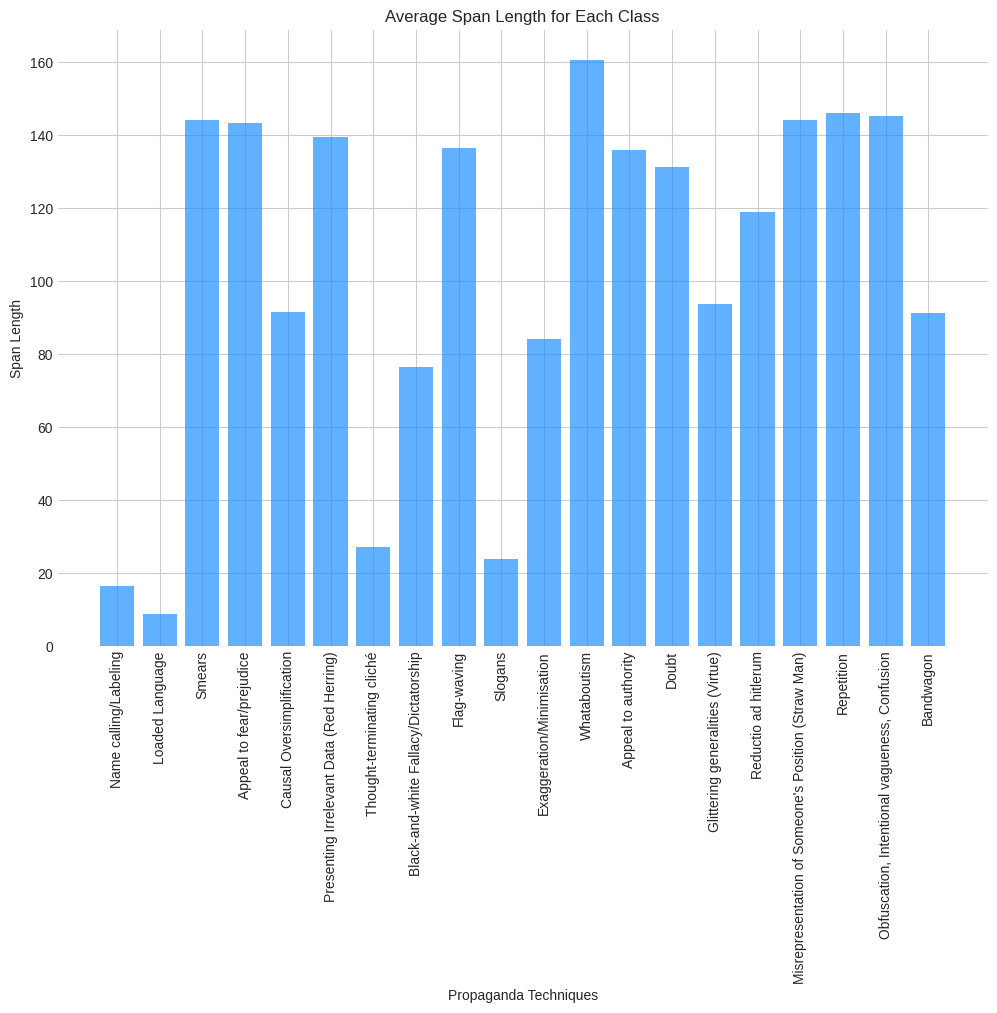

In [30]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(list(class_avg_span_length.keys()), avarege_spans_for_each_class, align = 'center', alpha = 0.7, color=colour_chosen)

plt.xticks(range(len(class_avg_span_length)),list(class_avg_span_length.keys()))
plt.ylabel('Span Length (Characters)')
plt.xlabel('Propaganda Techniques')
plt.title('Average Span Length for Each Class')

# Remove the border of the figure
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

# fig.autofmt_xdate() # So x tick labels are not overlapping
plt.show()

### 6. Average Number of Fallacies per Example

In [31]:
sample_count_per_avg_fallacy = {}
average_fallacy_per_sample_list = []
for label in df['LABELS']:
    average_fallacy_per_sample_list.append(len(label['labels']))
    try:
        sample_count_per_avg_fallacy[len(label['labels'])] += 1
    except:
        sample_count_per_avg_fallacy[len(label['labels'])] = 1

In [32]:
pd.Series(average_fallacy_per_sample_list).describe()

count    961.000000
mean       2.469303
std        1.625751
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
dtype: float64

In [33]:
sample_count_per_avg_fallacy = dict(sorted(sample_count_per_avg_fallacy.items()))
avg_fallacy_numbers = list(sample_count_per_avg_fallacy.keys())
sample_counts = list(sample_count_per_avg_fallacy.values())

sample_count_per_avg_fallacy

{0: 102,
 1: 178,
 2: 243,
 3: 212,
 4: 123,
 5: 60,
 6: 28,
 7: 10,
 8: 3,
 9: 1,
 10: 1}

### 7.Distribution of Number of Fallacies across Examples

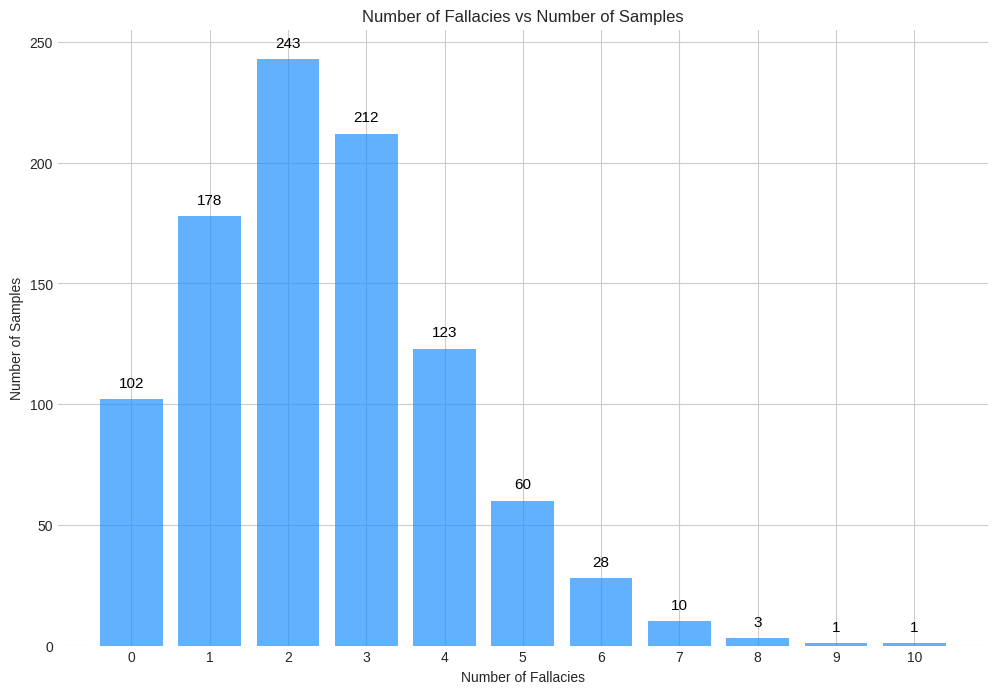

In [34]:
plt.figure(figsize = (12,8))

bars = plt.bar(range(len(sample_count_per_avg_fallacy)),sample_counts, align = 'center', alpha = 0.7, color=colour_chosen)
plt.xticks(range(len(sample_count_per_avg_fallacy)), avg_fallacy_numbers)
plt.ylabel('Number of Examples')
plt.xlabel('Number of Distinct Fallacies in a Example')
plt.title('Number of Distinct Fallacies in a Example vs Number of Examples')

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(0)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 5, 
                   str(sample_counts[i]), 
                 ha='center', color='black', fontsize=11)


plt.show()

### 8. Percentage Distribution of Classes (Pie Chart)

In [35]:
list(class_avg_span_length.keys())
# Manually ordered the list so the percentages don;t overlap
labels = [
 'Name calling/Labeling',
 'Repetition',
 'Doubt',
 'Reductio ad hitlerum',
 'Appeal to fear/prejudice',
 "Misrepresentation of Someone's Position (Straw Man)",
 'Loaded Language',
 'Bandwagon',
 'Smears',
 'Obfuscation, Intentional vagueness, Confusion',
 'Glittering generalities (Virtue)',
 'Causal Oversimplification',
 'Appeal to authority',
 'Presenting Irrelevant Data (Red Herring)',
 'Thought-terminating cliché',
 'Black-and-white Fallacy/Dictatorship',
 'Slogans',
 'Whataboutism',
 'Exaggeration/Minimisation',
 'Flag-waving']

In [36]:
# cmap = plt.get_cmap('Blues')
# colors = list(cmap(np.linspace(0.35, 2.05, len(x))))
colors =[
 'rosybrown',
 'navajowhite',
 'darkgreen',
 'deepskyblue',
 'saddlebrown',
 'deeppink',
 'teal',
 'lime',
 'mediumslateblue',
 'gold',
 'darkorange',
 'lightpink',
 'coral', 
 'grey',
 'violet',
 'royalblue',
 'aquamarine',
 'red',
 'olive',
 'black',
]

In [37]:
class_span_count = {}
for key, val in list(class_avg_span_length.items()):
    class_span_count[key] = val['span_count']
class_span_count

{'Name calling/Labeling': 527,
 'Loaded Language': 657,
 'Smears': 336,
 'Appeal to fear/prejudice': 77,
 'Causal Oversimplification': 80,
 'Presenting Irrelevant Data (Red Herring)': 55,
 'Thought-terminating cliché': 43,
 'Black-and-white Fallacy/Dictatorship': 34,
 'Flag-waving': 20,
 'Slogans': 39,
 'Exaggeration/Minimisation': 330,
 'Whataboutism': 37,
 'Appeal to authority': 12,
 'Doubt': 33,
 'Glittering generalities (Virtue)': 41,
 'Reductio ad hitlerum': 8,
 "Misrepresentation of Someone's Position (Straw Man)": 16,
 'Repetition': 15,
 'Obfuscation, Intentional vagueness, Confusion': 10,
 'Bandwagon': 3}

In [38]:
total_number_of_spans_for_each_class = [class_span_count[l] for l in labels]

<Figure size 640x480 with 0 Axes>

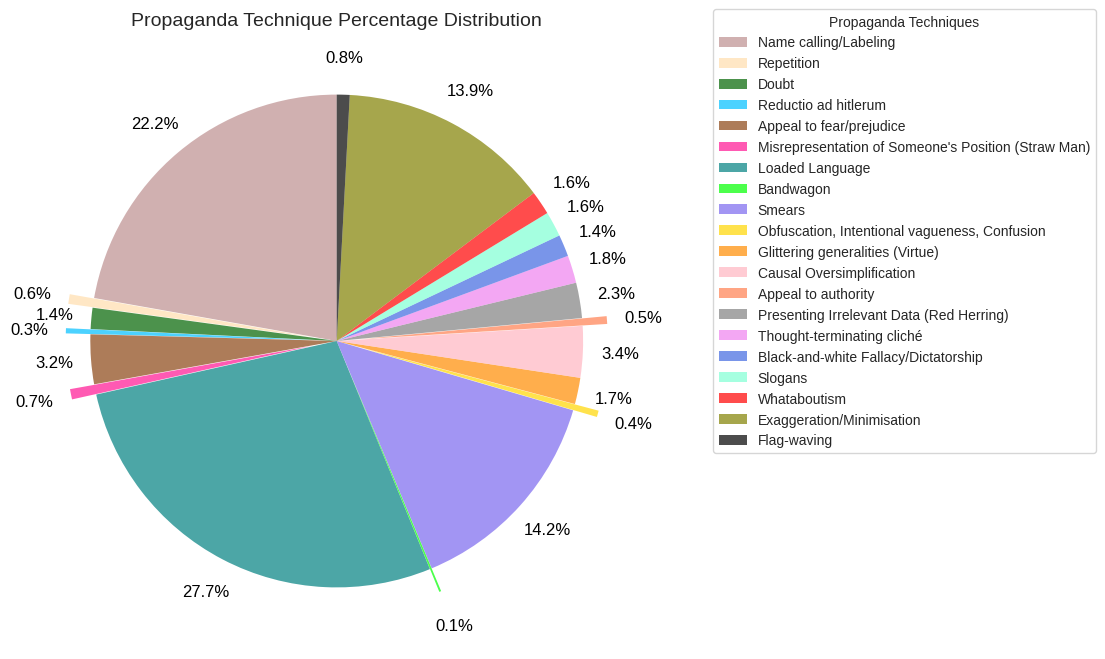

In [72]:
# https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
plt.figure()
fig, ax = plt.subplots(figsize = (12,8))
patches, texts, pcts = ax.pie(
    total_number_of_spans_for_each_class, 
#     labels=labels, 
    autopct='%.1f%%',
#     wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    wedgeprops={"alpha": 0.7},
    colors=colors,
    textprops={'size': 'large'},
    startangle=90,
    pctdistance=1.15,
    explode=(0., 0.1, 0., 0.1, 0., 0.1, 0., 0.1, 0., 0.1, 0., 0., 0.1, 0., 0., 0., 0., 0., 0., 0.),
#     np.zeros(len(total_number_of_spans_for_each_class))
#     shadow = True
    )

# Get colour of the labels the same as the colour of the patch
# for i, patch in enumerate(patches):
#     if texts[i].get_text() == 'Smears':
#         patch.set_facecolor('dodgerblue')
#     texts[i].set_color(patch.get_facecolor())
    
plt.setp(pcts, color='black')
# plt.setp(texts, fontweight=600)


ax.set_title('Propaganda Technique Percentage Distribution', fontsize=14)
plt.legend(patches, labels, title = "Propaganda Techniques", bbox_to_anchor=(1.1, 1.05), frameon=True) #loc="best",
# plt.tight_layout()
plt.show()

### 8. Average Span Length Distribution per Class (Box and Whisker Plot)

In [45]:
average_span_per_class = {}
for label in df['LABELS']:
    if len(label['labels']) != 0:
        for l in label['labels']:
            span = int(l['end_index']) - int(l['start_index'])
            try:
                average_span_per_class[l['technique']].append(span)
            except:
                average_span_per_class[l['technique']] = []
                average_span_per_class[l['technique']].append(span)

<Figure size 640x480 with 0 Axes>

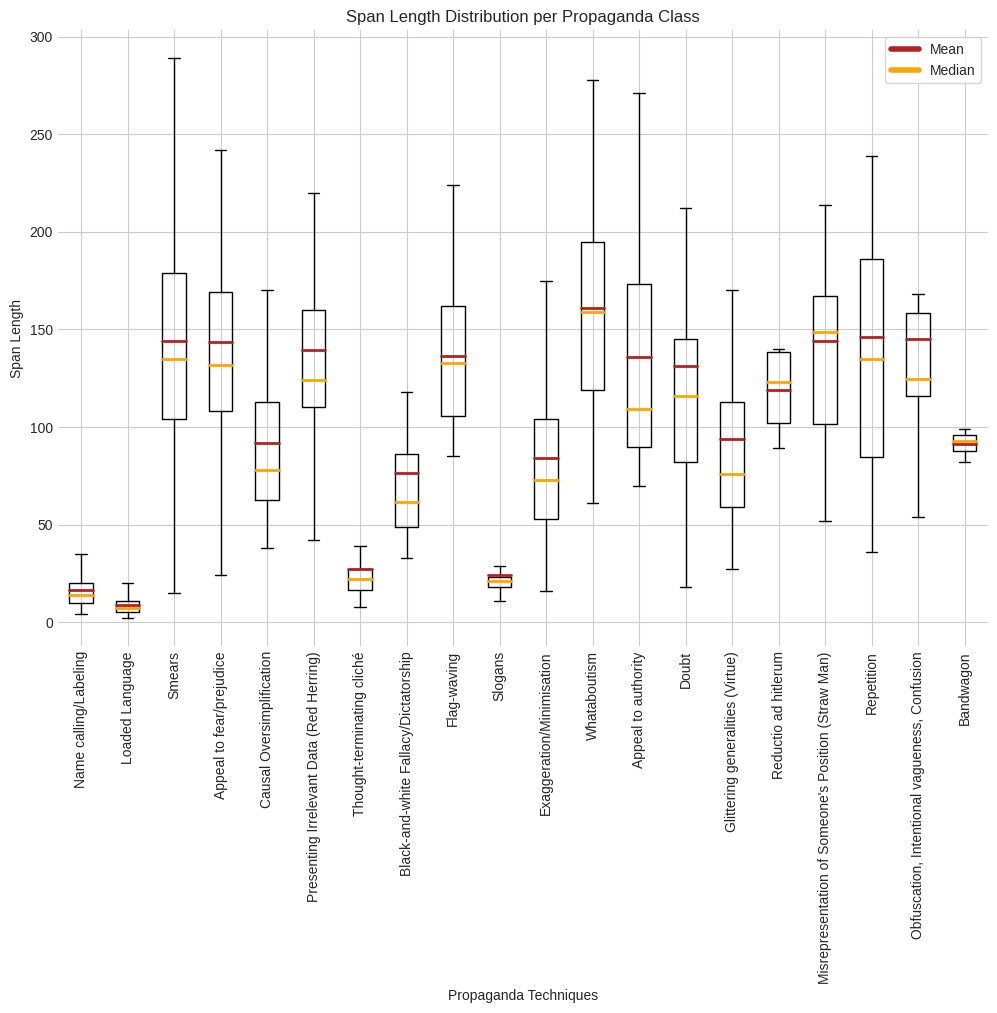

In [79]:
# https://matplotlib.org/stable/gallery/statistics/boxplot.html
plt.figure()
fig, ax = plt.subplots(figsize = (12,8))
# SHowfliers shows the outlier circles
medianprops = dict(linestyle='-', linewidth=2, color='orange')
meanlineprops = dict(linestyle='-', linewidth=2, color='firebrick')
ax.boxplot(average_span_per_class.values(), showfliers=False, meanline=True, meanprops=meanlineprops, showmeans=True, medianprops=medianprops)

ax.set_xticklabels(average_span_per_class.keys())
plt.ylabel('Span Length (Characters)')
plt.xlabel('Propaganda Techniques')
plt.title('Span Length Distribution per Propaganda Class')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
custom_lines = [Line2D([0], [0], color='firebrick', lw=4), Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'], frameon=True, loc="best")
    
plt.show()

### 9. Co-occurence Matrix of Techniques

In [173]:
cooccurence_matrix = {}
fallacies = list(class_avg_span_length.keys())
d = pd.DataFrame(0, index=fallacies, columns=fallacies)
d

,Name calling/Labeling,Loaded Language,Smears,Appeal to fear/prejudice,Causal Oversimplification,Presenting Irrelevant Data (Red Herring),Thought-terminating cliché,Black-and-white Fallacy/Dictatorship,Flag-waving,Slogans,Exaggeration/Minimisation,Whataboutism,Appeal to authority,Doubt,Glittering generalities (Virtue),Reductio ad hitlerum,Misrepresentation of Someone's Position (Straw Man),Repetition,"Obfuscation, Intentional vagueness, Confusion",Bandwagon
Name calling/Labeling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Loaded Language,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Smears,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Appeal to fear/prejudice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Causal Oversimplification,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Presenting Irrelevant Data (Red Herring),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Thought-terminating cliché,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Black-and-white Fallacy/Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Flag-waving,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Slogans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
for label in df['LABELS']:
    if len(label['labels']) != 0:
        fallacy_set = set()
        for l in label['labels']:
            fallacy_set.add(l['technique'])
        for f in fallacy_set:
            for j in fallacy_set:
                if f != j:
                    d[f][j] += 1
                    d[j][f] += 1

In [175]:
d

,Name calling/Labeling,Loaded Language,Smears,Appeal to fear/prejudice,Causal Oversimplification,Presenting Irrelevant Data (Red Herring),Thought-terminating cliché,Black-and-white Fallacy/Dictatorship,Flag-waving,Slogans,Exaggeration/Minimisation,Whataboutism,Appeal to authority,Doubt,Glittering generalities (Virtue),Reductio ad hitlerum,Misrepresentation of Someone's Position (Straw Man),Repetition,"Obfuscation, Intentional vagueness, Confusion",Bandwagon
Name calling/Labeling,0,382,350,46,50,28,24,24,12,34,236,22,6,14,26,6,18,12,10,0
Loaded Language,382,0,298,96,82,46,42,28,18,46,234,40,8,20,24,10,10,10,6,4
Smears,350,298,0,52,48,42,18,10,10,20,272,34,2,32,20,10,18,18,6,2
Appeal to fear/prejudice,46,96,52,0,16,4,6,2,26,4,40,4,2,0,0,8,0,0,0,0
Causal Oversimplification,50,82,48,16,0,6,6,0,6,2,52,0,6,0,0,0,0,2,2,0
Presenting Irrelevant Data (Red Herring),28,46,42,4,6,0,2,4,2,2,42,0,0,6,0,2,0,0,0,0
Thought-terminating cliché,24,42,18,6,6,2,0,8,0,0,16,2,2,0,0,0,0,0,0,0
Black-and-white Fallacy/Dictatorship,24,28,10,2,0,4,8,0,0,4,16,0,0,2,4,0,2,0,2,0
Flag-waving,12,18,10,26,6,2,0,0,0,4,16,0,2,0,0,0,0,0,0,0
Slogans,34,46,20,4,2,2,0,4,4,0,10,6,0,0,2,0,0,0,0,0


In [176]:
matrix = d.values+0.0
np.fill_diagonal(matrix, -1, wrap=False)
matrix = matrix.astype(int)
matrix

array([[ -1, 382, 350,  46,  50,  28,  24,  24,  12,  34, 236,  22,   6,
         14,  26,   6,  18,  12,  10,   0],
       [382,  -1, 298,  96,  82,  46,  42,  28,  18,  46, 234,  40,   8,
         20,  24,  10,  10,  10,   6,   4],
       [350, 298,  -1,  52,  48,  42,  18,  10,  10,  20, 272,  34,   2,
         32,  20,  10,  18,  18,   6,   2],
       [ 46,  96,  52,  -1,  16,   4,   6,   2,  26,   4,  40,   4,   2,
          0,   0,   8,   0,   0,   0,   0],
       [ 50,  82,  48,  16,  -1,   6,   6,   0,   6,   2,  52,   0,   6,
          0,   0,   0,   0,   2,   2,   0],
       [ 28,  46,  42,   4,   6,  -1,   2,   4,   2,   2,  42,   0,   0,
          6,   0,   2,   0,   0,   0,   0],
       [ 24,  42,  18,   6,   6,   2,  -1,   8,   0,   0,  16,   2,   2,
          0,   0,   0,   0,   0,   0,   0],
       [ 24,  28,  10,   2,   0,   4,   8,  -1,   0,   4,  16,   0,   0,
          2,   4,   0,   2,   0,   2,   0],
       [ 12,  18,  10,  26,   6,   2,   0,   0,  -1,   4,  16,  

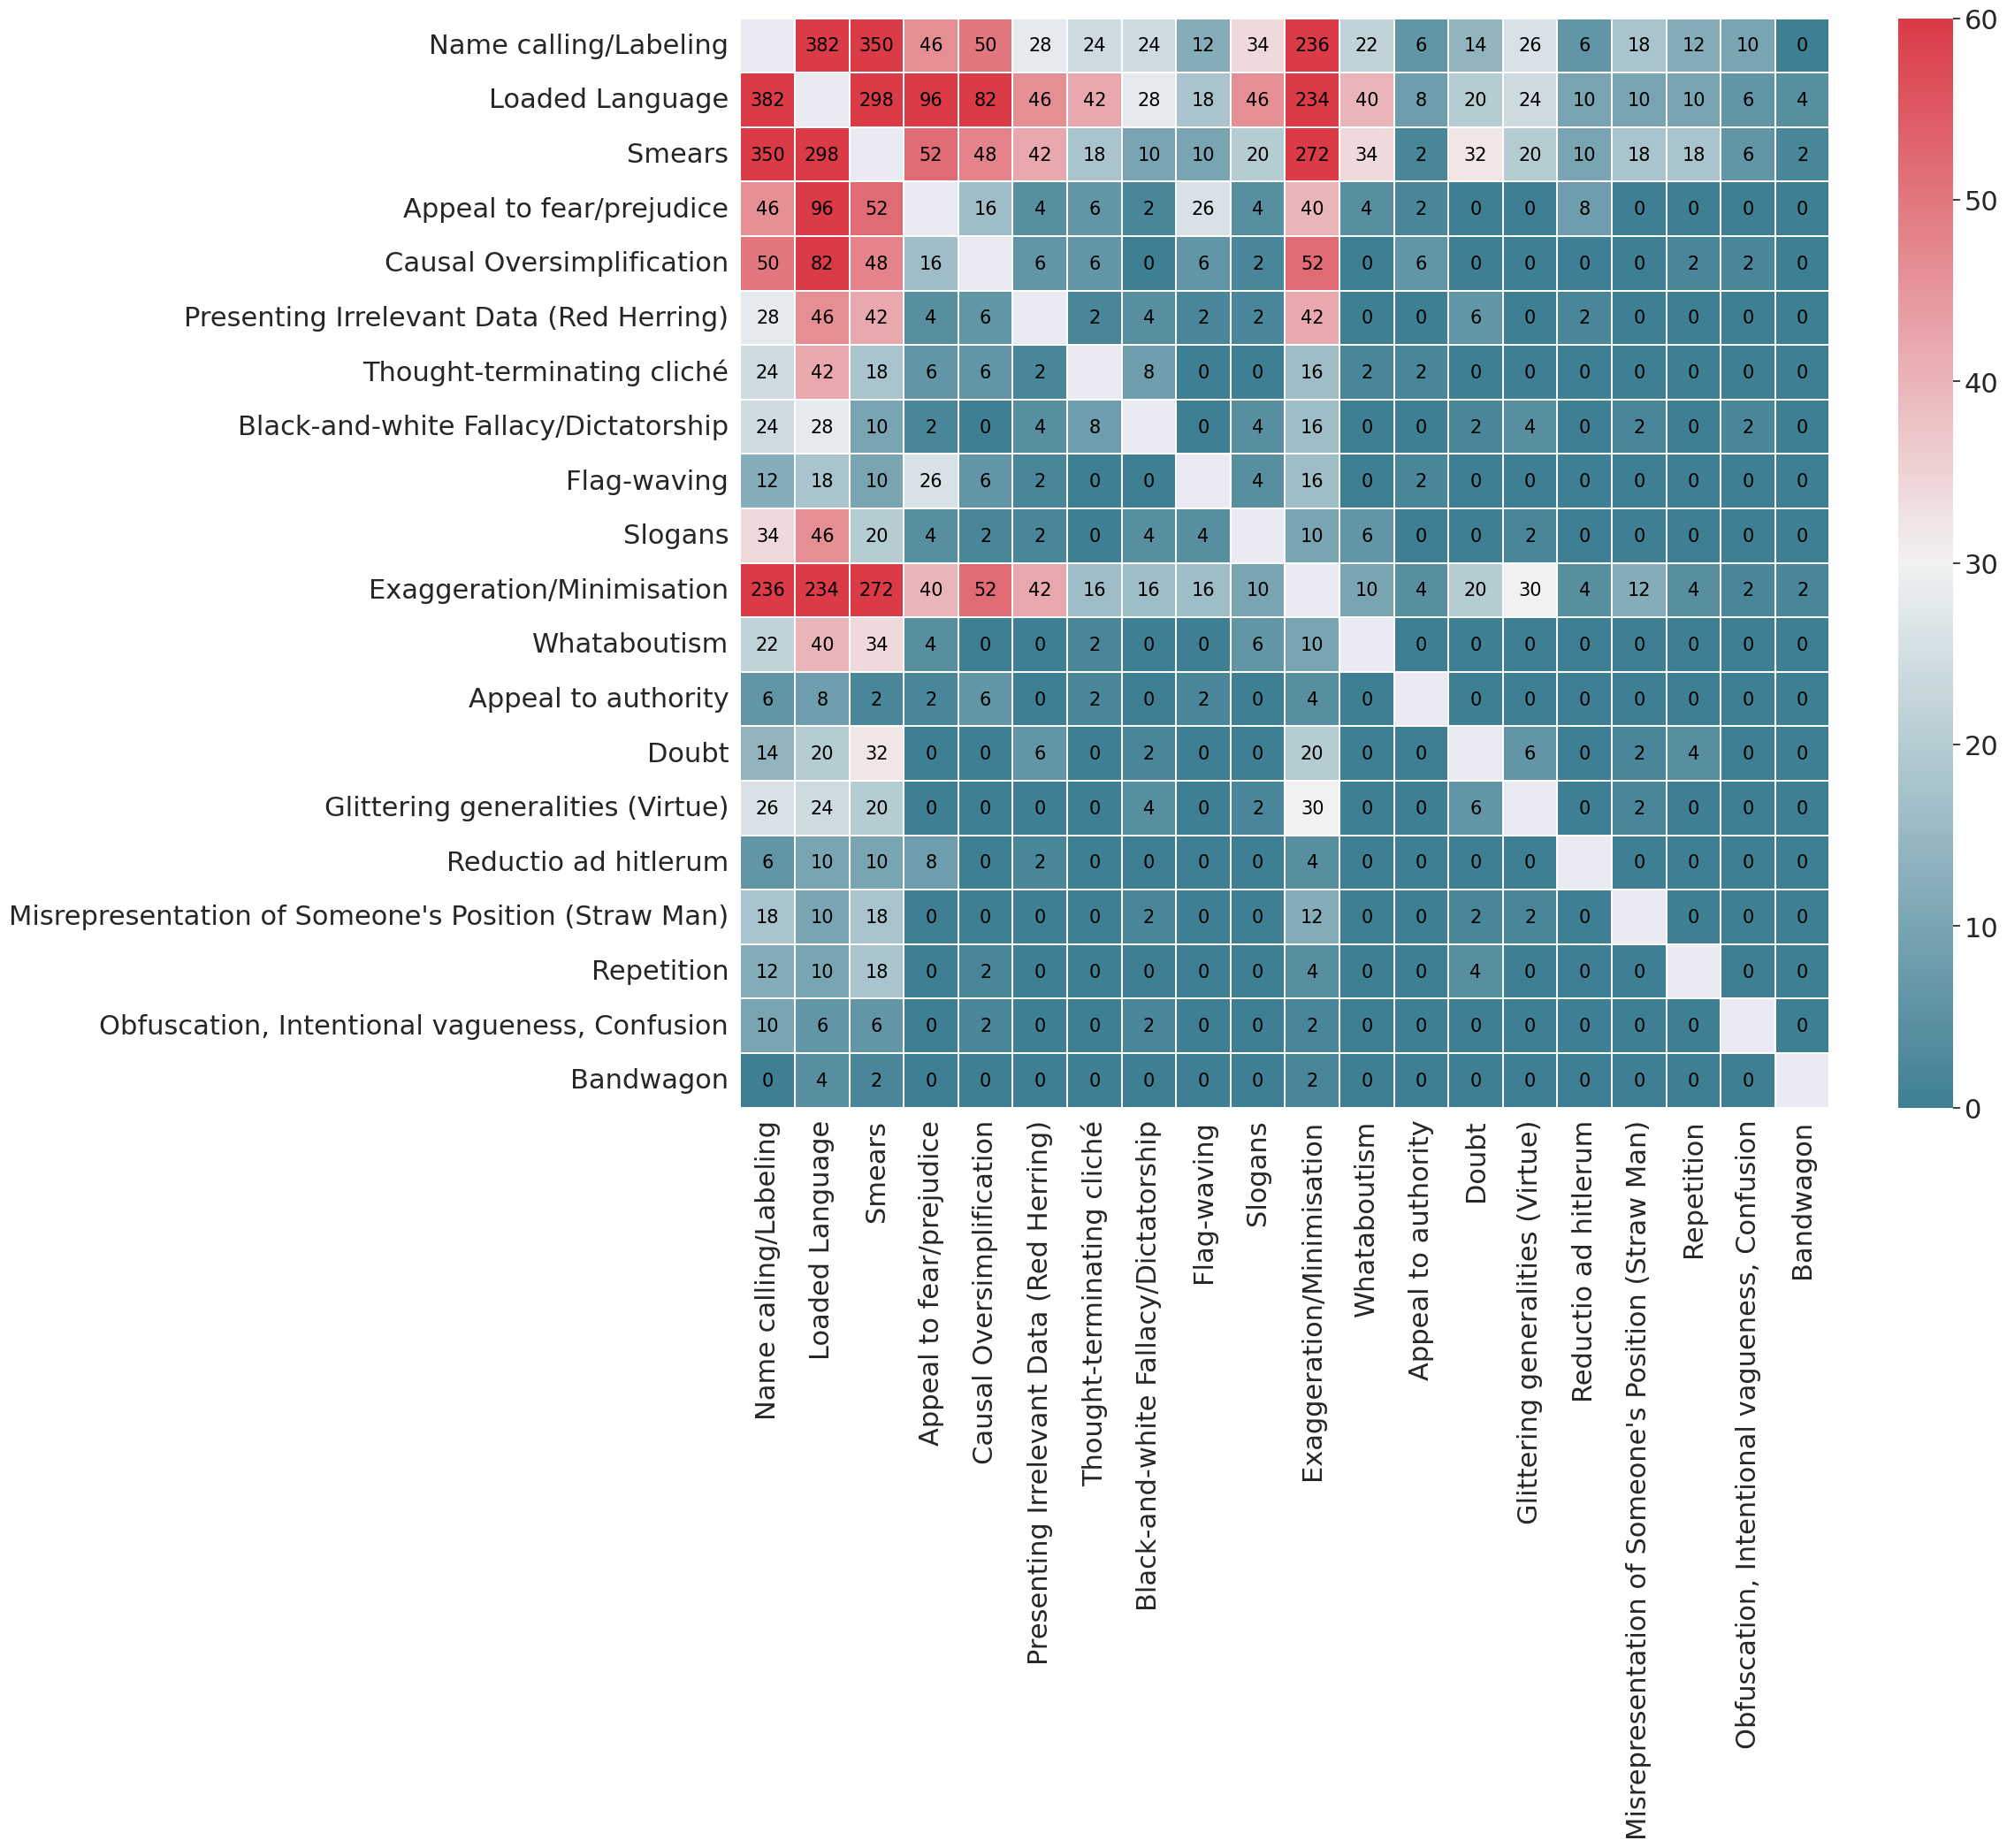

In [183]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.set(font_scale=2)
ax = sns.heatmap(
    matrix, 
    annot=True,
#     cmap= 'viridis',
    mask=(matrix<0),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    linewidths=1.25,
    xticklabels=fallacies,
    yticklabels=fallacies,
    cbar=True,
    fmt='',
    annot_kws={'size': 15, 'color': 'black'},
    vmin=0,
    vmax=60)

In [ ]:
XLM ROberta